# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

# Proyecto: Identificación de sitio de unión en factores transcripcionales

A handful of structural motifs confer DNA-binding proteins (DBPs) their ability to recognize specific sequences. DBPs exhibit a ‘base readout’ mechanism, in which specific contacts between DNA bases and amino acid side chains on the protein determine the binding affinity. Most prokaryotic regulators form symmetric oligomers, which require operators with a dyad structure. Structural basis of DBP specificity, predicting binding sites and designing new DBPs with engineered specificity remain challenging tasks

`Direct-Repeat`

<img src="./Figures/Fig3.png" width="800" height="800"/>

`Inverted-Repeat`

<img src="./Figures/Fig5.png" width="900" height="900"/>

En este proyecto, utilizaremos un conjunto de secuencias de DNA y convertir en parámetros estructurales que contienen un sitio de unión para construir un modelo capaz de predecir si una secuencia de TF es simetrica o no.

http://web.pcyt.unam.mx/EntrafDB/general_table.html

# Convertir una cadena en datos numéricos

La primera tarea es convertir una secuencia de nucleótidos (cadena) en información que pueda usarse para entrenar un modelo. Hay algunas maneras:
1. Convierta la cadena en una matriz, es decir
A = [1, 0, 0, 0], C = [0, 1, 0, 0], G = [0,0, 1, 0], e T = [0, 0, 0, 1]
2. Convertir la secuencia en propiedades químicas de los nucleótidos (entalpía, enlaces químicos, etc.)
3. El que usaremos en este enfoque se basa en la DNA duplex stability  (DDS), se calcula como la suma de su energía libre de pares de bases. Considera los valores de energía libre asociados a las 16 posibles combinaciones de dinucleótidos (Kanhere & Bansal, 2005)

   `AA`: -1.00,
   
   `AT`: -0.88,
   
   `TA`: -0.58,
   
   `AG`: -1.30,
   
   `GA`: -1.30,
   
   `TT`: -1.00,
   
   `AC`: -1.45,
   
   `CA`: -1.45,
   
   `TG`: -1.44,
   
   `GT`: -1.44,
   
   `TC`: -1.28,
   
   `CT`: -1.28,
   
   `CC`: -1.84,
   
   `CG`: -2.24,
   
   `GC`: -2.27,
   
   `GG`: -1.84


In [1]:
stability_values = {
    'AA': -1,
    'AT': -0.88,
    'TA': -0.58,
    'AG': -1.3,
    'GA': -1.3,
    'TT': -1,
    'AC': -1.45,
    'CA': -1.45,
    'TG': -1.44,
    'GT': -1.44,
    'TC': -1.28,
    'CT': -1.28,
    'CC': -1.84,
    'CG': -2.24,
    'GC': -2.27,
    'GG': -1.84
}

In [2]:
path = './Data/'
path_out = './DSS/'

import os 
for filename in os.listdir(path):
  if not os.path.isdir(os.path.join(path, filename)):
    with open(path+filename, "r") as file:
      vetor_dados= file.readlines() #jogar o arquivo de entrada para uma lista
      vetor_dados = [line3.strip() for line3 in vetor_dados]#retira o \n da lista

      print(filename)

      for line in vetor_dados:
        if ">" not in line:
          line_len = len(line)

          
          stability_list = [stability_values.get(line[i:i+2].upper(), 0) for i in range(0, len(line)-1)]
          count = 0
          with open(path_out+filename, "a+") as out:
              for item in stability_list:
                out.write(str(item)+"\t")
                count+=1
                print(count)
                if count == line_len-1:
                  out.write("\n")
                  count = 0

In [3]:
import pandas as pd

AcrR = pd.read_csv('./Data/AcrR.faa', sep='\t',
                   header=None)
AcrR

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-2.24,-1.440000,-1.44,-2.270000,-1.280000,-0.580000,-0.88,-1.440000,-1.840000,-1.440000,...,-1.00,-0.88,-1.280000,-1.280000,-0.58,-1.000000,-1.45,-2.240000,-2.270000,NaN
1,-0.88,-1.000000,-1.00,-0.580000,-0.880000,-1.000000,-0.58,-1.450000,-1.840000,-2.240000,...,-0.58,-1.45,-1.840000,-1.840000,-1.84,-1.280000,-0.58,-0.880000,-1.000000,NaN
2,-1.28,-1.450000,-1.45,-1.280000,-0.580000,-1.450000,-1.45,-1.450000,-2.240000,-2.270000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.27,-2.240000,-1.44,-1.000000,-0.580000,-1.300000,-1.30,-0.880000,-1.000000,-1.000000,...,-1.84,-1.45,-0.880000,-0.580000,-1.30,-2.270000,-1.45,-1.450000,-2.240000,NaN
4,-0.88,-0.580000,-1.00,-0.880000,-1.000000,-1.280000,-1.84,-1.280000,-1.280000,-1.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.45,-0.880000,-1.28,-2.240000,-1.840000,-1.440000,-1.28,-1.450000,-1.000000,-0.880000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-2.27,-1.280000,-1.00,-1.000000,-0.580000,-1.450000,-1.84,-1.280000,-1.280000,-1.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1.61,-1.267143,-1.23,-1.321429,-0.962857,-1.214286,-1.31,-1.318571,-1.497143,-1.532857,...,-1.14,-1.26,-1.333333,-1.233333,-1.24,-1.516667,-1.16,-1.523333,-1.836667,0.0
8,-2.24,-1.440000,-1.44,-2.270000,-1.280000,-0.580000,-0.88,-1.440000,-1.840000,-1.440000,...,-1.00,-0.88,-1.280000,-1.280000,-0.58,-1.000000,-1.45,-2.240000,-2.270000,NaN
9,-0.88,-1.000000,-1.00,-0.580000,-0.880000,-1.000000,-0.58,-1.450000,-1.840000,-2.240000,...,-0.58,-1.45,-1.840000,-1.840000,-1.84,-1.280000,-0.58,-0.880000,-1.000000,NaN


Podemos hacer un gráfico con estos datos.

<img src="./Figures/AcrR.png" width="300" height="300"/>


Donde la línea negra representa el valor medio, la línea punteada negra representa la región del sitio de unión y la línea punteada azul una señal de dónde puede estar la simetría. Vale la pena mencionar que no todos los gráficos son perfectamente simétricos, pero claramente se puede notar cierto grado de simetría entre los picos o dos valles. También hay TFs que no muestran ningún grado de simetría.

<img src="./Figures/ChbR.png" width="300" height="300"/>

# Creación de un modelo para predecir TF

Usemos los datos DSS calculados en el paso anterior para crear un modelo y validarlo. Sin embargo, para crear un modelo, necesitamos un conjunto de datos que represente los TF y un conjunto de datos, preferiblemente equivalente en cantidad de datos, que represente los no TF.

Preguntas: 
1. ¿Cómo obtener un conjunto de datos de no TF?
2. ¿Deberíamos escalar los datos?
3. ¿Qué tipos de preprocesamiento podemos hacer?

## Importando o dataset

In [31]:
df = pd.read_csv('./DSS/TF_non_TF.csv', sep='\t')
df

,Bp1,Bp2,Bp3,Bp4,Bp5,Bp6,Bp7,Bp8,Bp9,Bp10,...,Bp82,Bp83,Bp84,Bp85,Bp86,Bp87,Bp88,Bp89,Bp90,Target
0,-1.45,-1.00,-0.88,-0.58,-1.00,-0.88,-0.58,-1.30,-1.44,-1.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,-0.88,-1.44,-1.44,-1.00,-1.44,-1.84,-1.30,-1.00,-0.88,-1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-1.45,-1.00,-1.45,-1.84,-1.45,-1.00,-1.45,-1.28,-0.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.58,-0.88,-0.58,-0.88,-1.44,-1.30,-0.88,-1.00,-0.58,-1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-1.44,-1.44,-0.58,-0.88,-1.00,-0.58,-1.00,-1.00,-1.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,-2.27,-2.24,-1.30,-1.30,-1.44,-1.28,-1.45,-0.88,-1.00,-1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6404,-0.58,-0.88,-0.58,-0.88,-1.44,-1.44,-1.00,-0.58,-1.45,-1.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6405,-0.58,-1.45,-1.84,-1.28,-1.44,-1.44,-1.00,-0.58,-0.88,-1.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6406,-1.30,-1.00,-1.30,-1.44,-1.44,-1.44,-1.44,-1.30,-0.88,-0.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Tenga en cuenta que en el conjunto de datos anterior, faltan muchos valores (NaN). Esto ocurre debido a la naturaleza de los datos, es decir, hay TF con sitios de unión más grandes y más pequeños. 

En nuestro caso, reemplacemos los datos que faltan con 0. ¡Cuidado! Este enfoque es simple, pero puede introducir un vies en los datos.

In [5]:
df = df.fillna(0)
df

,Bp1,Bp2,Bp3,Bp4,Bp5,Bp6,Bp7,Bp8,Bp9,Bp10,...,Bp82,Bp83,Bp84,Bp85,Bp86,Bp87,Bp88,Bp89,Bp90,Target
0,-1.45,-1.00,-0.88,-0.58,-1.00,-0.88,-0.58,-1.30,-1.44,-1.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.88,-1.44,-1.44,-1.00,-1.44,-1.84,-1.30,-1.00,-0.88,-1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.45,-1.00,-1.45,-1.84,-1.45,-1.00,-1.45,-1.28,-0.58,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.58,-0.88,-0.58,-0.88,-1.44,-1.30,-0.88,-1.00,-0.58,-1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.44,-1.44,-0.58,-0.88,-1.00,-0.58,-1.00,-1.00,-1.45,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,-2.27,-2.24,-1.30,-1.30,-1.44,-1.28,-1.45,-0.88,-1.00,-1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6404,-0.58,-0.88,-0.58,-0.88,-1.44,-1.44,-1.00,-0.58,-1.45,-1.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6405,-0.58,-1.45,-1.84,-1.28,-1.44,-1.44,-1.00,-0.58,-0.88,-1.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6406,-1.30,-1.00,-1.30,-1.44,-1.44,-1.44,-1.44,-1.30,-0.88,-0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
#Separamos la variables dependiente e independiente
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
#Vamos a evaluar nuestro árbol
y_pred = dt_classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Acurácia: 0.6443057722308893
Matriz de Confusão:
[[568 372]
 [312 671]]
Precisão: 0.6443955373485575
Revocação: 0.6434297958918638
F1-Score: 0.6432823839536574


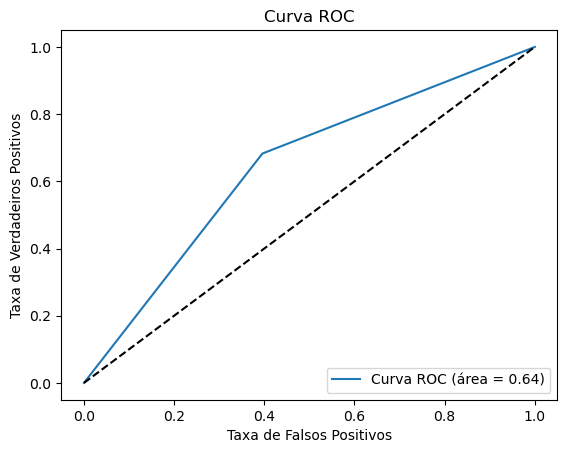

In [10]:
# exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, y_pred, average='macro')
print("Precisão:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Revocação:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plote a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# ¿Cuál es el efecto de optimizar los hiperparámetros del modelo?

In [11]:
from sklearn.model_selection import GridSearchCV

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


# Establecer los parámetros a evaluar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 8, 10, 12],
    'min_samples_leaf': [1, 3, 4, 5, 6, 7],
}

# classificador DecisionTree
dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Melhores parâmetros 
print("Mejores parámetros: ", grid_search.best_params_)


Mejores parámetros:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
   

# classificador DecisionTree con los mejores parámetros
dt_classifier = DecisionTreeClassifier(**best_params)


dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [13]:
y_pred = dt_classifier.predict(X_test)

Acurácia: 0.6276651066042642
Matriz de Confusão:
[[607 365]
 [351 600]]
Precisão: 0.6276866745270263
Revocação: 0.6277002116031207
F1-Score: 0.6276601728557984


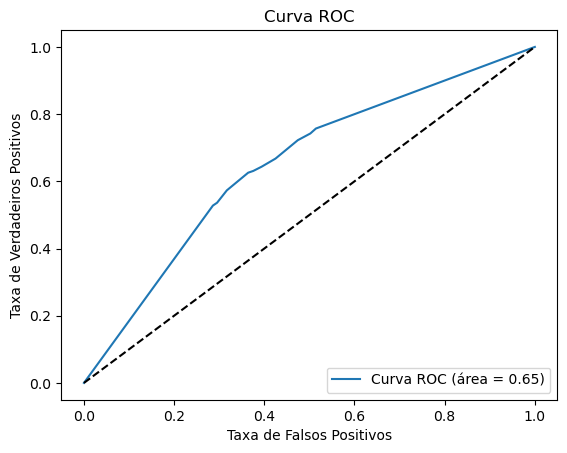

In [14]:
# exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precisão:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Revocação:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plote a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Esto nos lleva a la conclusión de que la optimización no siempre mejora (significativamente) la calidad del modelo.

# Cambiar el tipo de clasificador

In [15]:
from sklearn.ensemble import RandomForestClassifier
#Separamos la variables dependiente e independiente
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_classifier.predict(X_test)

Acurácia: 0.7477899115964639
Matriz de Confusão:
[[786 210]
 [275 652]]
Precisão: 0.7485955332600029
Revocação: 0.7462503736629366
F1-Score: 0.7465592818208178


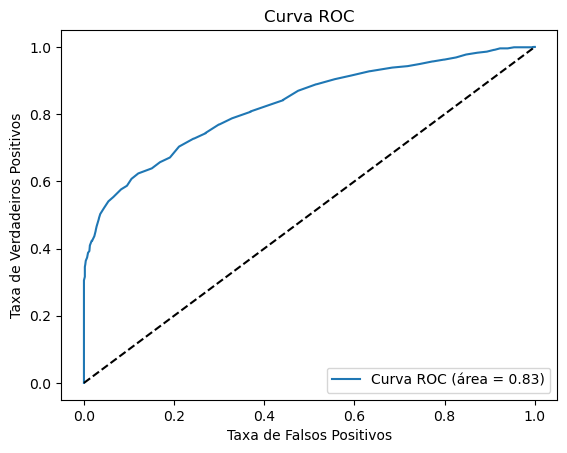

In [18]:
# exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precisão:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Revocação:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plote a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Eliminar algunos datos

In [19]:
df = pd.read_csv('./DSS/TF_non_TF-2.csv', sep='\t')
df

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,...,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bp21,Target
0,-1.45,-1.00,-0.88,-0.58,-1.00,-0.88,-0.58,-1.30,-1.44,-1.28,...,-1.00,-1.30,-1.30,-1.00,-1.00,-1.45,-1.28,-1.28,-1.28,0
1,-0.88,-1.44,-1.44,-1.00,-1.44,-1.84,-1.30,-1.00,-0.88,-1.00,...,-1.44,-2.27,-1.28,-1.28,-1.84,-1.28,-1.00,-1.00,-0.58,0
2,-1.45,-1.00,-1.45,-1.84,-1.45,-1.00,-1.45,-1.28,-0.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.58,-0.88,-0.58,-0.88,-1.44,-1.30,-0.88,-1.00,-0.58,-1.00,...,-1.44,-1.28,-1.45,-1.00,-1.45,-1.45,-0.88,-1.00,-1.00,0
4,-1.44,-1.44,-0.58,-0.88,-1.00,-0.58,-1.00,-1.00,-1.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,-2.27,-2.24,-1.30,-1.30,-1.44,-1.28,-1.45,-0.88,-1.00,-1.00,...,-0.58,-1.45,-1.28,-1.28,NaN,NaN,NaN,NaN,NaN,1
6257,-0.58,-0.88,-0.58,-0.88,-1.44,-1.44,-1.00,-0.58,-1.45,-1.45,...,-0.58,-0.88,-0.58,-1.00,-1.45,-1.45,-0.88,-1.00,-0.58,1
6258,-0.58,-1.45,-1.84,-1.28,-1.44,-1.44,-1.00,-0.58,-0.88,-1.44,...,-0.58,-0.88,-0.58,-1.00,-1.45,-1.45,-0.88,-0.58,-1.00,1
6259,-1.30,-1.00,-1.30,-1.44,-1.44,-1.44,-1.44,-1.30,-0.88,-0.58,...,-0.58,-0.88,-0.58,-1.00,-1.45,-1.45,-0.88,-1.00,-1.00,1


In [20]:
mean_values = df.mean()
mean_values

bp1      -1.223091
bp2      -1.237465
bp3      -1.238483
bp4      -1.259762
bp5      -1.249097
bp6      -1.229469
bp7      -1.219253
bp8      -1.225067
bp9      -1.228739
bp10     -1.229015
bp11     -1.222055
bp12     -1.237564
bp13     -1.241147
bp14     -1.265855
bp15     -1.277421
bp16     -1.274756
bp17     -1.246444
bp18     -1.238588
bp19     -1.198193
bp20     -1.185179
bp21     -1.166620
Target    0.500240
dtype: float64

In [21]:
df = df.fillna(mean_values)
df

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,...,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bp21,Target
0,-1.45,-1.00,-0.88,-0.58,-1.00,-0.88,-0.58,-1.30,-1.44,-1.280000,...,-1.000000,-1.300000,-1.300000,-1.000000,-1.000000,-1.450000,-1.280000,-1.280000,-1.28000,0
1,-0.88,-1.44,-1.44,-1.00,-1.44,-1.84,-1.30,-1.00,-0.88,-1.000000,...,-1.440000,-2.270000,-1.280000,-1.280000,-1.840000,-1.280000,-1.000000,-1.000000,-0.58000,0
2,-1.45,-1.00,-1.45,-1.84,-1.45,-1.00,-1.45,-1.28,-0.58,-1.229015,...,-1.241147,-1.265855,-1.277421,-1.274756,-1.246444,-1.238588,-1.198193,-1.185179,-1.16662,0
3,-0.58,-0.88,-0.58,-0.88,-1.44,-1.30,-0.88,-1.00,-0.58,-1.000000,...,-1.440000,-1.280000,-1.450000,-1.000000,-1.450000,-1.450000,-0.880000,-1.000000,-1.00000,0
4,-1.44,-1.44,-0.58,-0.88,-1.00,-0.58,-1.00,-1.00,-1.45,-1.229015,...,-1.241147,-1.265855,-1.277421,-1.274756,-1.246444,-1.238588,-1.198193,-1.185179,-1.16662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,-2.27,-2.24,-1.30,-1.30,-1.44,-1.28,-1.45,-0.88,-1.00,-1.000000,...,-0.580000,-1.450000,-1.280000,-1.280000,-1.246444,-1.238588,-1.198193,-1.185179,-1.16662,1
6257,-0.58,-0.88,-0.58,-0.88,-1.44,-1.44,-1.00,-0.58,-1.45,-1.450000,...,-0.580000,-0.880000,-0.580000,-1.000000,-1.450000,-1.450000,-0.880000,-1.000000,-0.58000,1
6258,-0.58,-1.45,-1.84,-1.28,-1.44,-1.44,-1.00,-0.58,-0.88,-1.440000,...,-0.580000,-0.880000,-0.580000,-1.000000,-1.450000,-1.450000,-0.880000,-0.580000,-1.00000,1
6259,-1.30,-1.00,-1.30,-1.44,-1.44,-1.44,-1.44,-1.30,-0.88,-0.580000,...,-0.580000,-0.880000,-0.580000,-1.000000,-1.450000,-1.450000,-0.880000,-1.000000,-1.00000,1


In [22]:
#Separamos la variables dependiente e independiente
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
#Vamos a evaluar nuestro árbol
y_pred = dt_classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Acurácia: 0.6496408619313647
Matriz de Confusão:
[[383 242]
 [197 431]]
Precisão: 0.6503804375672491
Revocação: 0.6495528662420382
F1-Score: 0.6491259516299304


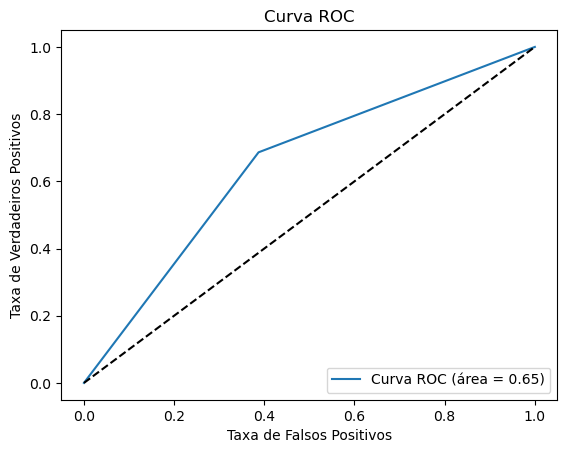

In [26]:
# exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, y_pred, average='macro')
print("Precisão:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Revocação:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plote a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
#Separamos la variables dependiente e independiente
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_classifier.predict(X_test)

Acurácia: 0.7486033519553073
Matriz de Confusão:
[[499 135]
 [180 439]]
Precisão: 0.7498563166780416
Revocação: 0.748137323351493
F1-Score: 0.7480255795261647


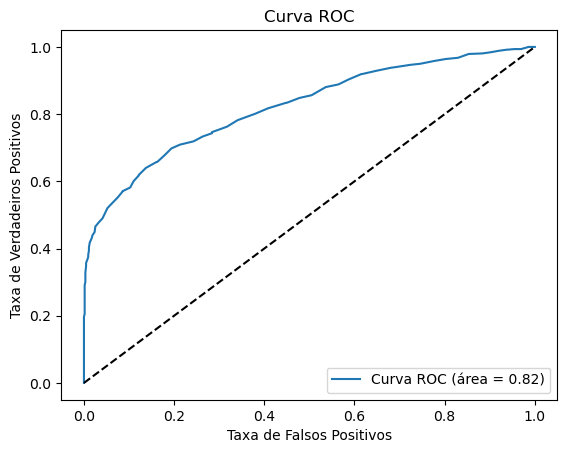

In [30]:
# exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precisão:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Revocação:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plote a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

https://sites.google.com/view/bioinformatica-yucatan/p%C3%A1gina-principal?authuser=0